In [29]:
from astropy.table import Table
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()
import os 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from astropy.table import QTable, Table, Column, MaskedColumn, join

In [30]:
t = Table.read('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/10yr_catalog/gll_psc_v23.fit') 
#Gets FERMI source catalog

In [31]:
t['CLASS1']

""
""
bcu
bll
fsrq
bcu
bcu
unk
bcu
bcu
spp


In [32]:
t['CLASS2']

""
""
""
""
""
""
""
""
""
""
""


In [33]:
import numpy as np

In [34]:
from scipy.special import gammaln

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[40,40]

In [36]:
from scipy import misc

In [37]:
from psrqpy import QueryATNF

In [38]:
query=QueryATNF()

In [39]:
import os 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from astropy.table import QTable, Table, Column, MaskedColumn, join

In [40]:
t = Table.read('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/10yr_catalog/gll_psc_v23.fit') #Gets FERMI source catalog

In [41]:

#Clean the Fermi Table and add a corresponding PSRJ column
t = Table(t, masked=True, copy=False) 
t['PSRJ'] = ''
t['PSRJ'] = MaskedColumn(t['PSRJ'],dtype='S12')
t['PSRJ'].mask = True
for ind,source in enumerate(t):
    class1 = source['CLASS1']
    class2 = source['CLASS2']
    t['CLASS1'][ind] = class1.strip()
    t["CLASS2"][ind] = class2.strip()
    if t['CLASS1'][ind] == 'PSR' or t['CLASS1'][ind] == 'psr':
        name = source['ASSOC1']
        parts = name.split(' ')
        t['PSRJ'][ind] = parts[1]
        t['PSRJ'].mask[ind] = False
    if t["CLASS2"][ind] == 'psr': #Note that there are no CLASS2 = PSR sources
        name = source['ASSOC2']
        parts = name.split(' ')
        t['PSRJ'][ind] = parts[1]
        t['PSRJ'].mask[ind] = False

In [42]:
print(set(t['CLASS1']))

{'', 'hmb', 'PWN', 'sbg', 'pwn', 'agn', 'spp', 'SFR', 'sfr', 'BLL', 'psr', 'unk', 'snr', 'glc', 'NOV', 'css', 'lmb', 'gal', 'RDG', 'FSRQ', 'LMB', 'BIN', 'GAL', 'NLSY1', 'bll', 'sey', 'BCU', 'HMB', 'bcu', 'nlsy1', 'rdg', 'bin', 'PSR', 'ssrq', 'AGN', 'SNR', 'fsrq'}


In [43]:
print(set(t['CLASS2']))

{'', 'sey', 'unk', 'bin', 'sbg', 'glc', 'agn', 'psr'}


In [44]:
print(t[t['CLASS2'] == 'glc'])

   Source_Name     DataRelease RAJ2000  DEJ2000  ... Unc_Counterpart Flags PSRJ
                                 deg      deg    ...       deg                 
------------------ ----------- -------- -------- ... --------------- ----- ----
4FGL J1836.8-2354            1 279.2112 -23.9067 ...             nan     2   --


In [45]:
print(sum(t['PSRJ'].mask == True))

5519


In [46]:
print(sum(t['PSRJ'].mask == False))

269


In [47]:
combined_table = join(query.table, t.filled(), keys='PSRJ',join_type='outer') #joins the tables
combined_table = Table(combined_table, masked=True, copy=False)

(0.5, 300)

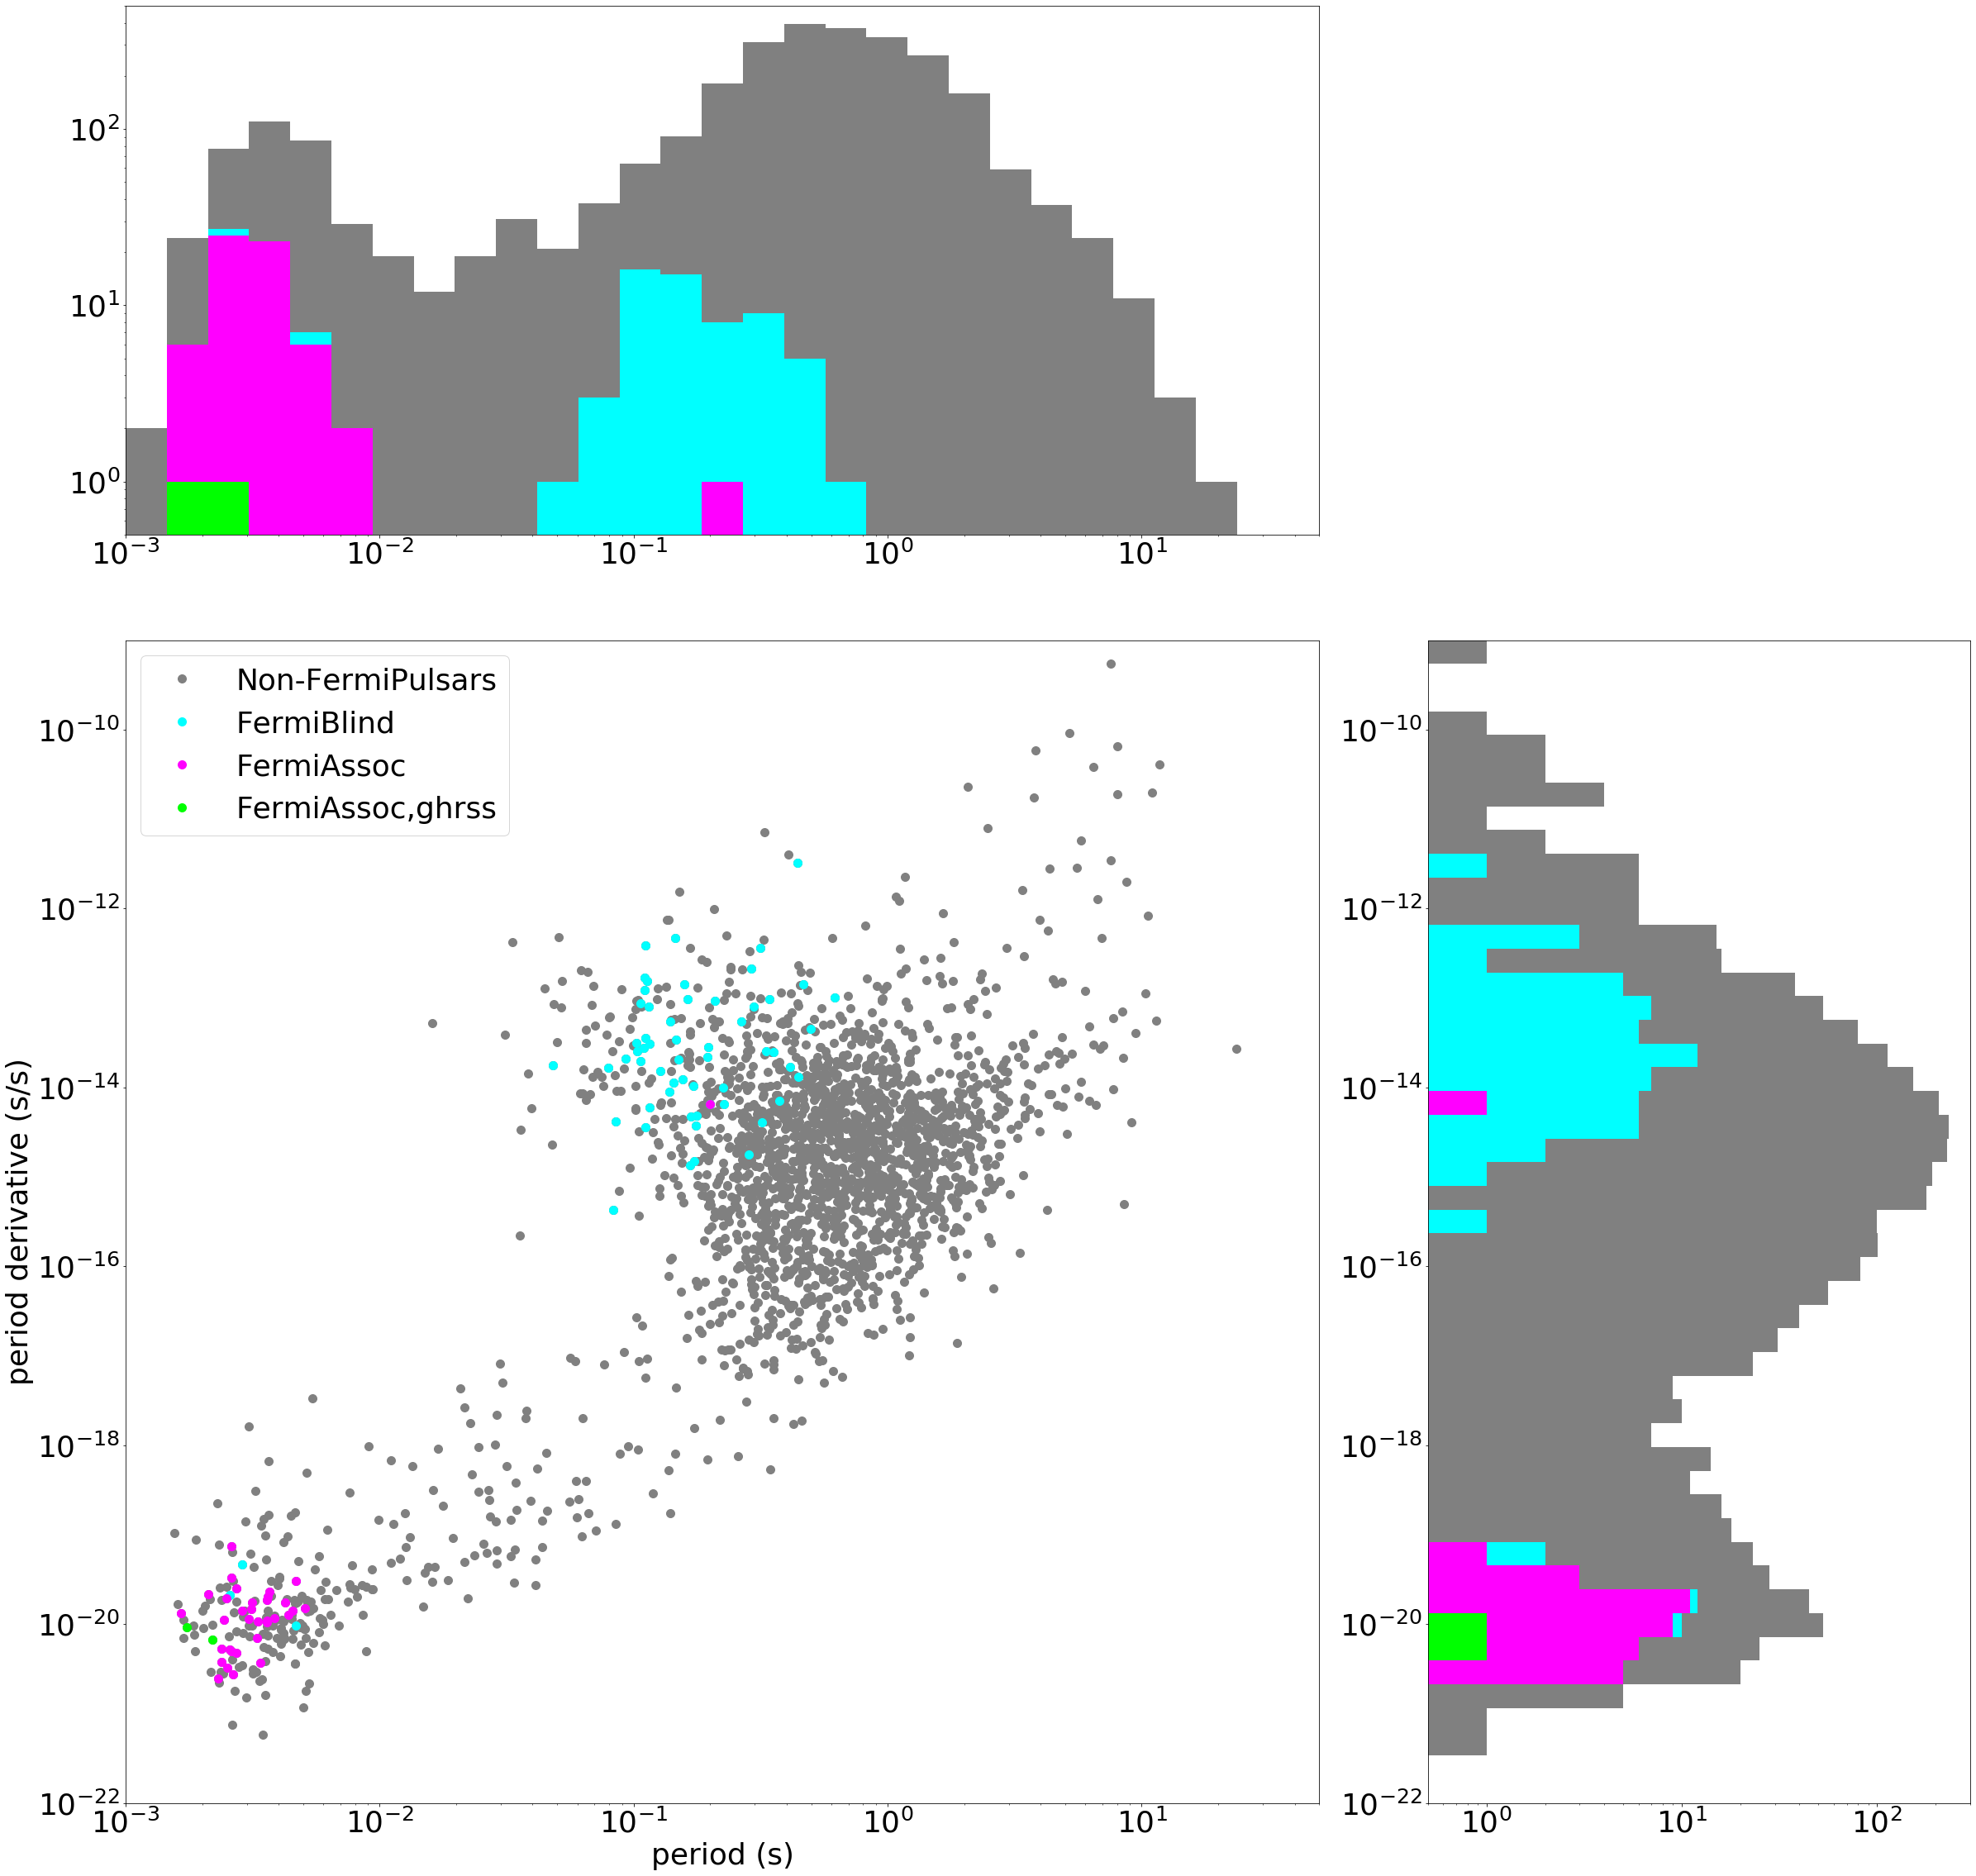

In [48]:
colors=["grey","lime","magenta","cyan"]
pulsar_periodderivatives=query.table['P1']
Not_Fermi=[np.logical_and([query.table['SURVEY']!='FermiAssoc'],np.logical_and([query.table['SURVEY']!='FermiBlind'],[query.table['SURVEY']!='FermiAssoc,ghrss']))]
pulsar_periods=query.table['P0']
Not_Fermi=np.array(Not_Fermi)
Not_Fermi=Not_Fermi.flatten()
def rotate(lst, x):    
    return lst[-x:] + lst[:-x]
mpl.rcParams.update({'font.size': 36})
fig = plt.figure(figsize=(40, 40))  
scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2, fig=fig)
x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                               sharex=scatter_axes,fig=fig )
y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                               sharey=scatter_axes, fig=fig)



scatter_axes.plot(query.table['P0'],query.table['P1'] , '.',color='grey',label='Non-FermiPulsars',markersize=20)
scatter_axes.plot(query.table['P0'][query.table['SURVEY']=='FermiBlind'],
            query.table['P1'][query.table['SURVEY']=='FermiBlind'],'.',color=colors[3],label='FermiBlind',markersize=20)
scatter_axes.set_xscale('log')
scatter_axes.set_yscale('log')
scatter_axes.set_ylim(1e-22, 1e-9)
scatter_axes.set_xlim(0.001,50)
scatter_axes.set_xlabel("period (s)")
scatter_axes.set_ylabel("period derivative (s/s)")



scatter_axes.plot(query.table['P0'][query.table['SURVEY']=='FermiAssoc'],
            query.table['P1'][query.table['SURVEY']=='FermiAssoc'],'.',color=colors[2],label='FermiAssoc',markersize=20)
#x_hist_axes.hist(positive['P0'],bins=np.logspace(np.log10(1e-3),np.log10(3.0),30))
#y_hist_axes.hist(positive['P1'],bins=np.logspace(np.log10(1e-22),np.log10(1e-9),50),orientation='horizontal')
#x_hist_axes.set_xscale('log')
#y_hist_axes.set_xscale('log')
#y_hist_axes.set_xlim(1e-22, 1e-9)
#x_hist_axes.set_xlim(0.001,50)
#x_hist_axes.set_xlabel("period (s)")
#y_hist_axes.set_xlabel("period derivative (s/s)")

scatter_axes.plot(query.table['P0'][query.table['SURVEY']=='FermiAssoc,ghrss'],
            query.table['P1'][query.table['SURVEY']=='FermiAssoc,ghrss'],'.',color=colors[1],label='FermiAssoc,ghrss',markersize=20)
scatter_axes.legend()


x_hist_axes.hist([pulsar_periods[query.table['SURVEY']=='FermiAssoc,ghrss'],
         pulsar_periods[query.table['SURVEY']=='FermiAssoc'],
          pulsar_periods[query.table['SURVEY']=='FermiBlind'],pulsar_periods[Not_Fermi]],
          bins=np.logspace(np.log10(1e-3),np.log10(50),30),color=rotate(colors[0:4],-1),stacked=True)
y_hist_axes.hist([pulsar_periodderivatives[query.table['SURVEY']=='FermiAssoc,ghrss'],
         pulsar_periodderivatives[query.table['SURVEY']=='FermiAssoc'],
          pulsar_periodderivatives[query.table['SURVEY']=='FermiBlind'],pulsar_periodderivatives[Not_Fermi]],
          bins=np.logspace(np.log10(1e-22),np.log10(1e-9),50),orientation='horizontal',color=rotate(colors[0:4],-1),stacked=True)
x_hist_axes.set_yscale("log")
y_hist_axes.set_xscale("log")
x_hist_axes.set_ylim(0.5,500)
y_hist_axes.set_xlim(0.5,300)


In [49]:
from astropy import units as u
from astropy.coordinates import SkyCoord
combined_table['FERMIcoord'] = SkyCoord(combined_table['RAJ2000'], combined_table['DEJ2000'], unit=(u.deg, u.deg))
combined_table['ATNFcoord'] = SkyCoord(combined_table['RAJ'], combined_table['DECJ'], unit=(u.hourangle, u.deg))

In [50]:
a = np.array([combined_table['PSRJ'] == 'N'])
a = a.flatten()
print(sum(a))

0


In [51]:
combined_table.mask['PSRJ'] = Column(a)
print(sum(combined_table.mask['PSRJ']))

0


In [52]:
combined_table.mask['FERMIcoord'] = combined_table.mask['RAJ2000']

In [53]:
combined_table.mask['ATNFcoord'] = combined_table.mask['RAJ']


In [54]:
print(sum(combined_table.mask['FERMIcoord']))

2572


In [55]:
print(sum(combined_table.mask['ATNFcoord']))

5559


(0.5, 300)

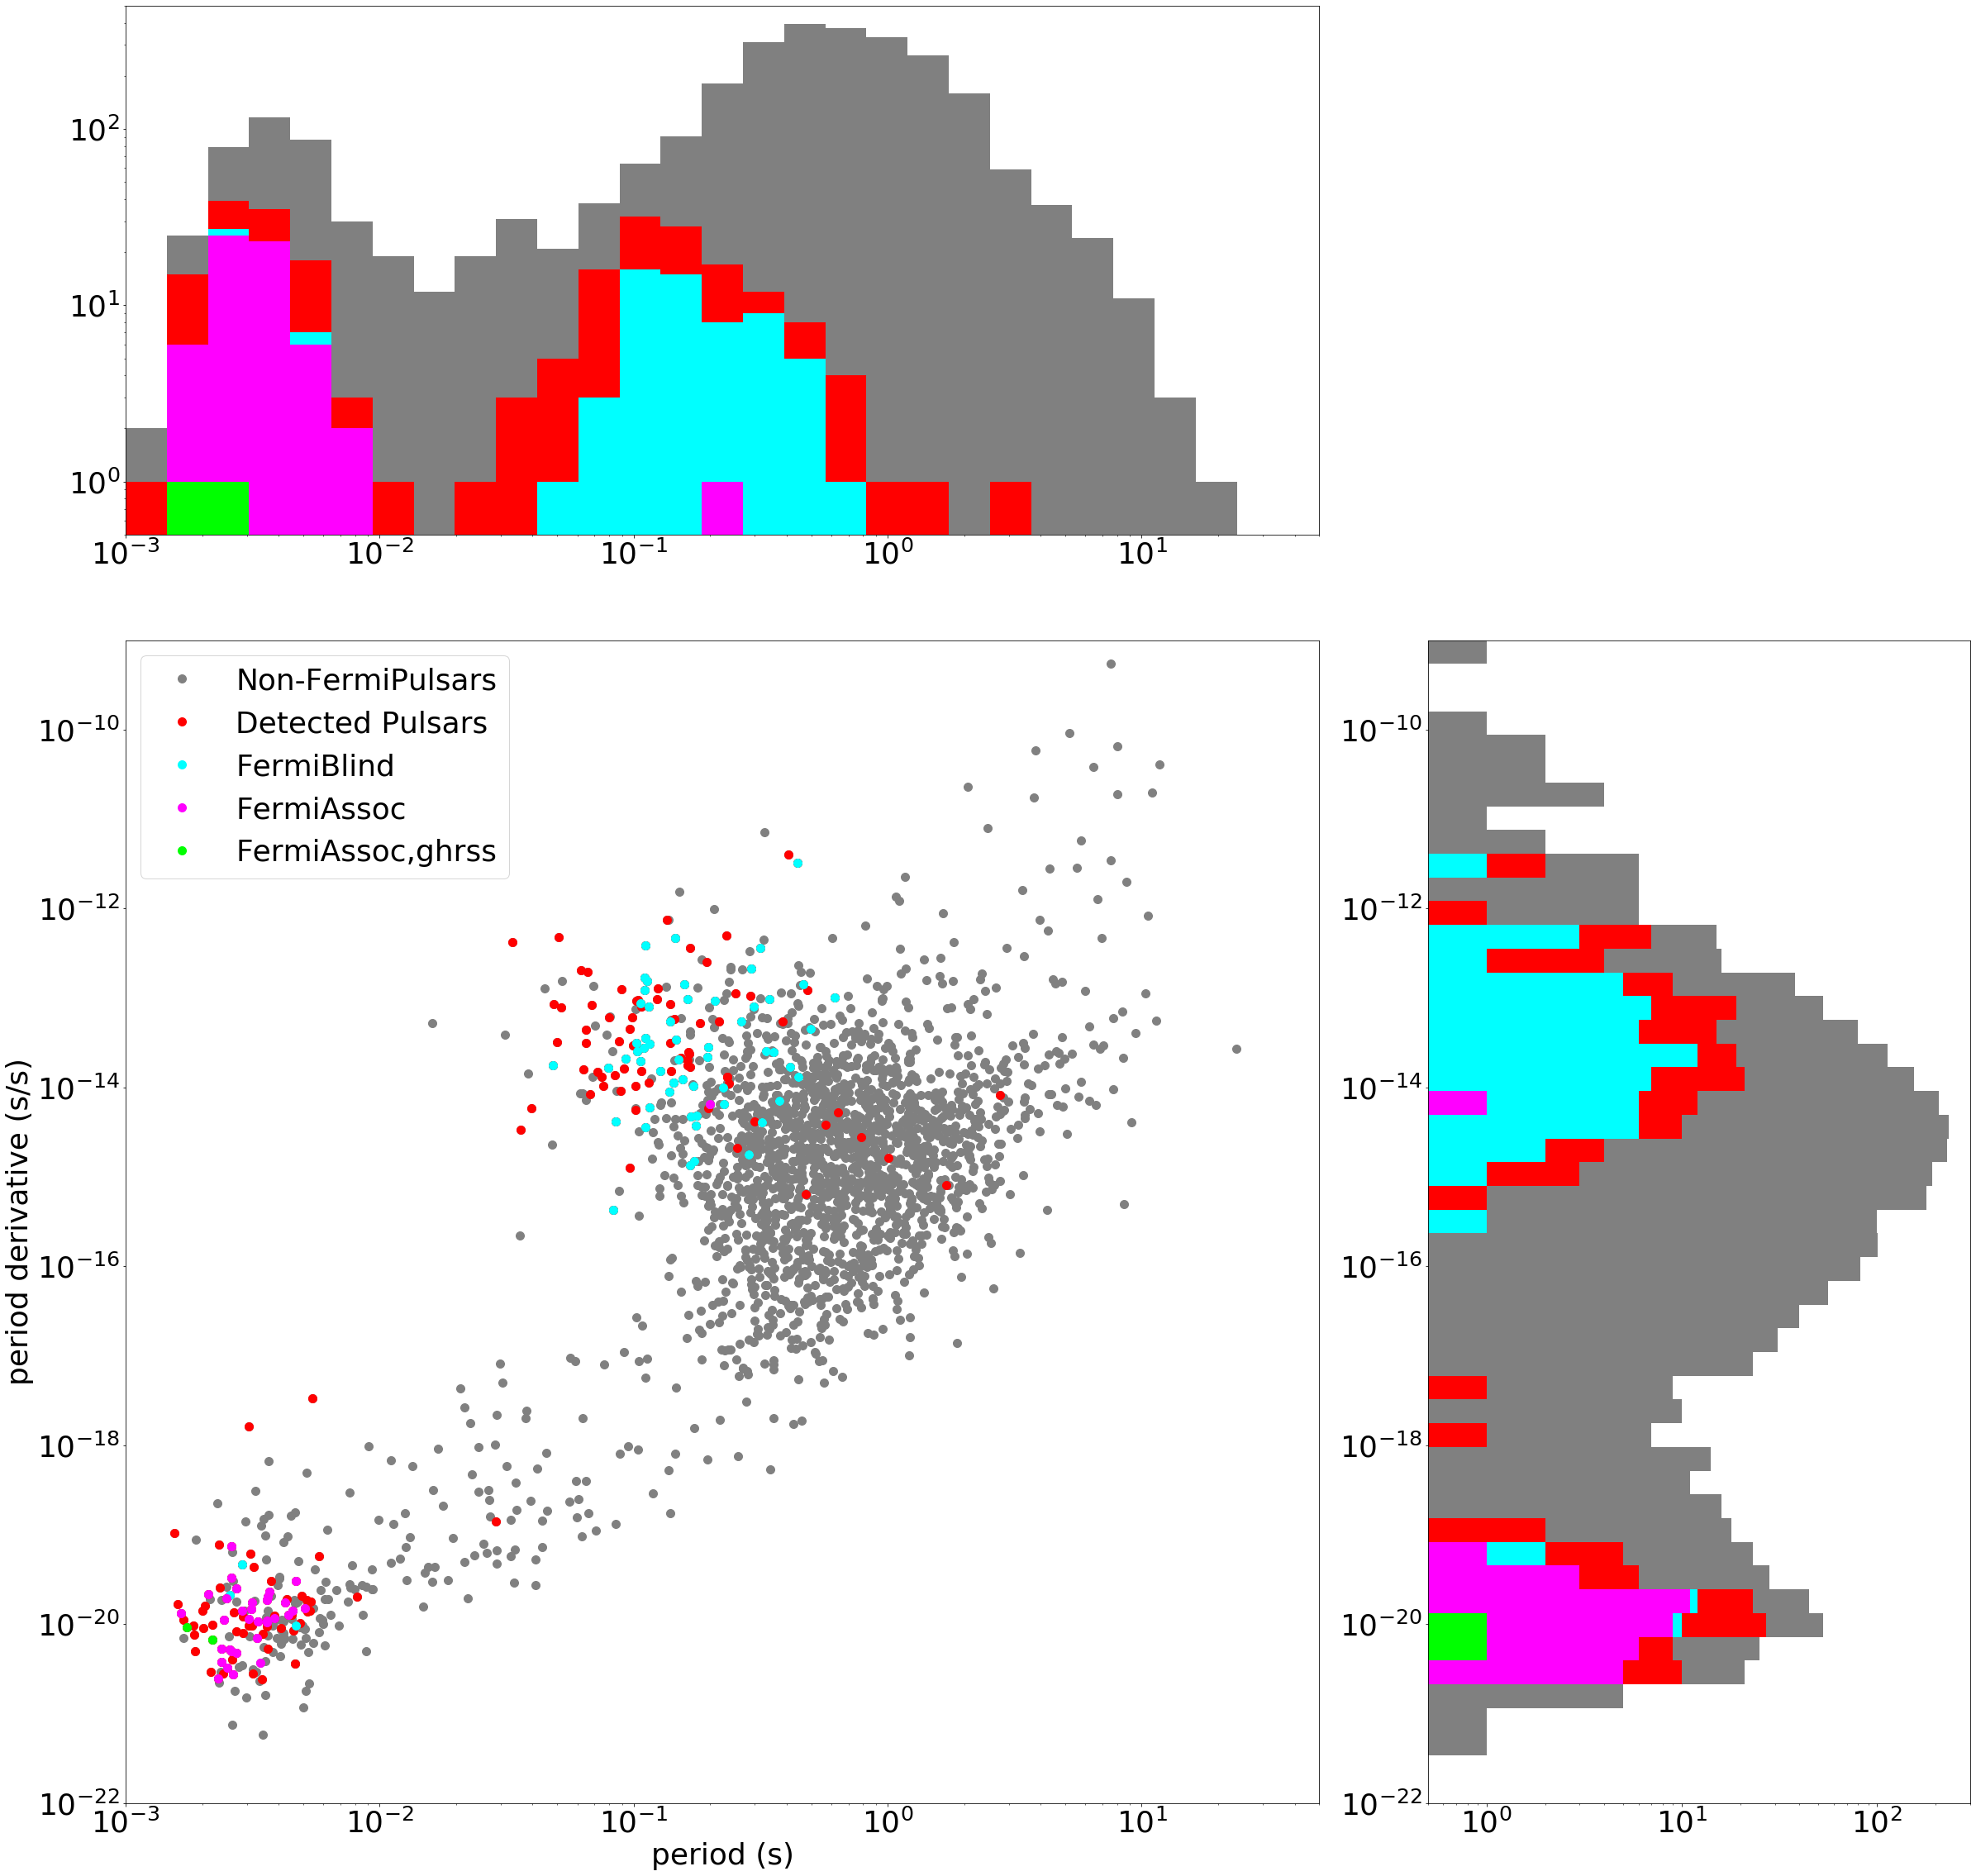

In [64]:
colors=["grey","lime","magenta","cyan","red"]
pulsar_periodderivatives=combined_table['P1']
Not_Fermi_ATNF=[np.logical_and([combined_table['SURVEY']!='FermiAssoc'],np.logical_and([combined_table['SURVEY']!='FermiBlind'],[combined_table['SURVEY']!='FermiAssoc,ghrss']))]
Not_Fermi_ATNF=np.array(Not_Fermi_ATNF)
Not_Fermi_ATNF=Not_Fermi_ATNF.flatten()
Fermi_Detected=[np.logical_and(combined_table.mask['FERMIcoord']==False,combined_table.mask['ATNFcoord']==False)]
Fermi_Detected=np.array(Fermi_Detected)
Fermi_Detected=Fermi_Detected.flatten()
Fermi_Detected_Not_Flagged=[np.logical_and(Not_Fermi_ATNF,Fermi_Detected)]
Fermi_Detected_Not_Flagged=np.array(Fermi_Detected_Not_Flagged)
Fermi_Detected_Not_Flagged=Fermi_Detected_Not_Flagged.flatten()
Not_Fermi=[np.logical_and(combined_table.mask['FERMIcoord']==True,combined_table.mask['ATNFcoord']==False)]
pulsar_periods=combined_table['P0']
Not_Fermi=np.array(Not_Fermi)
Not_Fermi=Not_Fermi.flatten()
def rotate(lst, x):    
    return lst[-x:] + lst[:-x]
mpl.rcParams.update({'font.size': 36})
fig = plt.figure(figsize=(40, 40))  
scatter_axes = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2, fig=fig)
x_hist_axes = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                               sharex=scatter_axes,fig=fig )
y_hist_axes = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                               sharey=scatter_axes, fig=fig)

scatter_axes.plot(combined_table['P0'],combined_table['P1'] , '.',color='grey',label='Non-FermiPulsars',markersize=20)
scatter_axes.plot(combined_table['P0'][combined_table.mask['FERMIcoord']==False],combined_table['P1'][combined_table.mask['FERMIcoord']==False],'.',color='red',label='Detected Pulsars',markersize=20)
scatter_axes.plot(combined_table['P0'][combined_table['SURVEY']=='FermiBlind'],
            combined_table['P1'][combined_table['SURVEY']=='FermiBlind'],'.',color=colors[3],label='FermiBlind',markersize=20)
scatter_axes.set_xscale('log')
scatter_axes.set_yscale('log')
scatter_axes.set_ylim(1e-22, 1e-9)
scatter_axes.set_xlim(0.001,50)
scatter_axes.set_xlabel("period (s)")
scatter_axes.set_ylabel("period derivative (s/s)")



scatter_axes.plot(combined_table['P0'][combined_table['SURVEY']=='FermiAssoc'],
            combined_table['P1'][combined_table['SURVEY']=='FermiAssoc'],'.',color=colors[2],label='FermiAssoc',markersize=20)
#x_hist_axes.hist(positive['P0'],bins=np.logspace(np.log10(1e-3),np.log10(3.0),30))
#y_hist_axes.hist(positive['P1'],bins=np.logspace(np.log10(1e-22),np.log10(1e-9),50),orientation='horizontal')
#x_hist_axes.set_xscale('log')
#y_hist_axes.set_xscale('log')
#y_hist_axes.set_xlim(1e-22, 1e-9)
#x_hist_axes.set_xlim(0.001,50)
#x_hist_axes.set_xlabel("period (s)")
#y_hist_axes.set_xlabel("period derivative (s/s)")

scatter_axes.plot(combined_table['P0'][combined_table['SURVEY']=='FermiAssoc,ghrss'],
            combined_table['P1'][combined_table['SURVEY']=='FermiAssoc,ghrss'],'.',color=colors[1],label='FermiAssoc,ghrss',markersize=20)
scatter_axes.legend()


x_hist_axes.hist([pulsar_periods[combined_table['SURVEY']=='FermiAssoc,ghrss'],
         pulsar_periods[combined_table['SURVEY']=='FermiAssoc'],
          pulsar_periods[combined_table['SURVEY']=='FermiBlind'],pulsar_periods[Fermi_Detected_Not_Flagged],pulsar_periods[Not_Fermi]],
          bins=np.logspace(np.log10(1e-3),np.log10(50),30),color=rotate(colors[0:5],-1),stacked=True)
y_hist_axes.hist([pulsar_periodderivatives[combined_table['SURVEY']=='FermiAssoc,ghrss'],
         pulsar_periodderivatives[combined_table['SURVEY']=='FermiAssoc'],
          pulsar_periodderivatives[combined_table['SURVEY']=='FermiBlind'],pulsar_periodderivatives[Fermi_Detected_Not_Flagged],pulsar_periodderivatives[Not_Fermi]],
          bins=np.logspace(np.log10(1e-22),np.log10(1e-9),50),orientation='horizontal',color=rotate(colors[0:5],-1),stacked=True)
x_hist_axes.set_yscale("log")
y_hist_axes.set_xscale("log")
x_hist_axes.set_ylim(0.5,500)
y_hist_axes.set_xlim(0.5,300)


In [66]:
combined_table[Fermi_Detected_Not_Flagged]

PSRJ,PSRJ_REF,RAJ,RAJ_ERR,RAJ_REF,DECJ,DECJ_ERR,DECJ_REF,POSEPOCH,POSEPOCH_REF,F0,F0_ERR,F0_REF,F1,F1_ERR,F1_REF,PEPOCH,PEPOCH_REF,DM,DM_ERR,DM_REF,S1400,S1400_REF,DIST_DM,DIST_DM_REF,DIST_DM1,DIST_DM1_REF,TYPE,ASSOC,SURVEY,RAJD,DECJD,JNAME,NAME,JNAME_REF,NAME_REF,P0,P0_ERR,P0_REF,P1,P1_ERR,P1_REF,DMEPOCH,DMEPOCH_REF,S400,S400_REF,S150,S150_ERR,S150_REF,SPINDX,SPINDX_ERR,SPINDX_REF,W50,W50_REF,W10,W10_REF,F2,F2_ERR,F2_REF,F3,F3_ERR,F3_REF,NGLT,DIST_AMN,DIST_AMN_REF,DIST_AMX,DIST_AMX_REF,S300,S300_REF,PSRB,PSRB_REF,PMRA,PMRA_ERR,PMRA_REF,PMDEC,PMDEC_ERR,PMDEC_REF,RM,RM_ERR,RM_REF,S400_ERR,S600,S600_ERR,S600_REF,S1400_ERR,TAU_SC,TAU_SC_ERR,TAU_SC_REF,BNAME,BNAME_REF,ELONG,ELONG_ERR,ELONG_REF,ELAT,ELAT_ERR,ELAT_REF,PMELONG,PMELONG_ERR,PMELONG_REF,PMELAT,PMELAT_ERR,PMELAT_REF,PX,PX_ERR,PX_REF,UNITS,UNITS_REF,BINCOMP,BINARY,BINARY_REF,TASC,TASC_ERR,TASC_REF,PBDOT,PBDOT_ERR,PBDOT_REF,FB0,FB0_ERR,FB0_REF,FB2,FB2_ERR,FB2_REF,FB3,FB3_ERR,FB3_REF,A1,A1_ERR,A1_REF,EPS1,EPS1_ERR,EPS1_REF,EPS2,EPS2_ERR,EPS2_REF,CLK,CLK_REF,EPHEM,EPHEM_REF,DIST_A,DIST_A_ERR,DIST_A_REF,T0,T0_ERR,T0_REF,PB,PB_ERR,PB_REF,ECC,ECC_ERR,ECC_REF,OM,OM_ERR,OM_REF,OMDOT,OMDOT_ERR,OMDOT_REF,FB1,FB1_ERR,FB1_REF,M2,M2_ERR,M2_REF,S300_ERR,W50_ERR,S100,S100_REF,S200,S200_ERR,S200_REF,S1600,S1600_ERR,S1600_REF,S50,S50_ERR,S50_REF,S80,S80_ERR,S80_REF,S800,S800_ERR,S800_REF,A1DOT,A1DOT_ERR,A1DOT_REF,W10_ERR,S900,S900_REF,S900_ERR,S60,S60_ERR,S60_REF,S5000,S5000_ERR,S5000_REF,DM1,DM1_ERR,DM1_REF,S100_ERR,BINCOMP_REF,S40,S40_ERR,S40_REF,TASC_2,TASC_2_ERR,TASC_2_REF,PB_2,PB_2_ERR,PB_2_REF,A1_2,A1_2_ERR,A1_2_REF,EPS1_2,EPS1_2_ERR,EPS1_2_REF,EPS2_2,EPS2_2_ERR,EPS2_2_REF,SINI,SINI_ERR,SINI_REF,M2_2,M2_2_ERR,M2_2_REF,MASS_Q,MASS_Q_ERR,MASS_Q_REF,S3000,S3000_ERR,S3000_REF,S700,S700_ERR,S700_REF,KOM,KOM_ERR,KOM_REF,KIN,KIN_ERR,KIN_REF,H3,H3_ERR,H3_REF,STIG,STIG_ERR,STIG_REF,H4,H4_ERR,H4_REF,GAMMA,GAMMA_ERR,GAMMA_REF,S2000,S2000_ERR,S2000_REF,DM2,DM2_ERR,DM2_REF,S100G,S100G_ERR,S100G_REF,S150G,S150G_ERR,S150G_REF,OM_ASC,OM_ASC_ERR,OM_ASC_REF,DM3,DM3_ERR,DM3_REF,T0_2,T0_2_ERR,T0_2_REF,T0_3,T0_3_ERR,T0_3_REF,PB_3,PB_3_ERR,PB_3_REF,A1_3,A1_3_ERR,A1_3_REF,ECC_2,ECC_2_ERR,ECC_2_REF,ECC_3,ECC_3_ERR,ECC_3_REF,OM_2,OM_2_ERR,OM_2_REF,OM_3,OM_3_ERR,OM_3_REF,SINI_2,SINI_2_ERR,SINI_2_REF,SINI_3,SINI_3_ERR,SINI_3_REF,M2_3,M2_3_ERR,M2_3_REF,A12DOT,A12DOT_ERR,A12DOT_REF,OM2DOT,OM2DOT_ERR,OM2DOT_REF,S6000,S6000_ERR,S6000_REF,TYPE_REF,FB,FB_ERR,FB_REF,F4,F4_ERR,F4_REF,F5,F5_ERR,F5_REF,S8000,S8000_ERR,S8000_REF,S9000,S9000_REF,S4000,S4000_REF,PMEPOCH,PMEPOCH_REF,S9000_ERR,ECCDOT,ECCDOT_ERR,ECCDOT_REF,DTHETA,DTHETA_ERR,DTHETA_REF,DIST,DIST1,GL,GB,XX,YY,ZZ,DMSINB,PMB,PML,AGE,BSURF,B_LC,EDOT,EDOTD2,PMTOT,PMTOT_ERR,VTRANS,P1_I,AGE_I,BSURF_I,EDOT_I,SI414,R_LUM,R_LUM14,MASSFN,MINMASS,MEDMASS,UPRMASS,MASSFN_ERR,MINOMDOT,ASSOC_ORIG,ASSOC_REF,TYPE_ORIG,BINCOMP_ORIG,Source_Name,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_Index,Unc_PLEC_Index,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,Npred,Flux_Band [7],"Unc_Flux_Band [7,2]",nuFnu_Band [7],Sqrt_TS_Band [7],Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,Flux_History [10],"Unc_Flux_History [10,2]",Sqrt_TS_History [10],ASSOC_FGL,ASSOC_FHL,ASSOC_GAM1,ASSOC_GAM2,ASSOC_GAM3,TEVCAT_FLAG,ASSOC_TEV,CLASS1,CLASS2,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags,FERMIcoord,ATNFcoord
,,,,,,,,d,,Hz,Hz,,1 / s2,1 / s2,,d,,pc / cm3,pc / cm3,,mJy,,kpc,,kpc,,,,,deg,deg,,,,,s,s,,,,,d,,mJy,,mJy,mJy,,,,,ms,,ms,,1 / s3,1 / s3,,1 /

In [65]:
# Include ['P0'] and ['P1'], of all the pulsars that have FERMIcoord. Going to do the Detected Pulsars. (Non-Fermi first, Detected, then FermiBlind etc)
# Copy cells 18 to 24
# Change query.table to combined_table

In [67]:
#Figure out what those 7 pulsars are in the middle. Describe them. What are they're names, find where they're cooordinates in the
#sky are 
#Include the red pulsars in Aitoff Projection

In [1]:
# The pulsar on the far right has a peruod derivative close to 10^-14.

In [2]:
# Try combined_table.show_in_browser(jsviewer=True),table[table['P0']>0.5]

In [ ]:
# t_show_in_browser(jsviewer=True)
# shorter_table=table[table['P0']>5]